!kaggle competitions download -c titanic

## Project Planning

* Understand the data behabior <p>
  1 Histograms<p>
  2 Value counts <p>
  3 Missing data<p>
  4 correlations of some fetures
* Explore interesting themes <p>
  1 Rich people survive<p>
  2 by locations<p>
  3 Age catterplot with ticket price<p>
  4 young and rich variable<p>
  5 Total Spend<p>
* Feature Engineering
* Proccess data together or use transformer ??
* Use feature augmentation ??
* Scaling
* Understand the limitations of the data
* Model base line
* Model benchmark

# Type of data

### 1 Numerical Data
* Histograms to undestand distributions
* Correlations plot
* Pivot tables tables comparing survival rates

### 2 Categorical Data
* Made barchars to understand balance between classes
* Made pivot tables to understand relationship with survival

In [267]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
import random
import time
from tqdm import tqdm
import IPython.display as ipd
import seaborn as sns
import itertools
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV , RandomizedSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn import svm
from sklearn.decomposition import PCA
from sklearn.neighbors import NeighborhoodComponentsAnalysis as NCA
from sklearn.neighbors import KNeighborsClassifier as KNC

%matplotlib inline
def plot_confusion_matrix(y_true, y_pred, class_names,title="Confusion matrix",normalize=False,onehot = False, size=4):
    """
    Returns a matplotlib figure containing the plotted confusion matrix.

    Args:
    cm (array, shape = [n, n]): a confusion matrix of integer classes
    class_names (array, shape = [n]): String names of the integer classes
    """
    if onehot :
        cm = confusion_matrix([y_i.argmax() for y_i in y_true], [y_ip.argmax() for y_ip in y_pred])
    else:
        cm = confusion_matrix(y_true, y_pred)
    figure = plt.figure(figsize=(size, size))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)

    # Normalize the confusion matrix.
    cm = np.around(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], decimals=2) if normalize else cm

    # Use white text if squares are dark; otherwise black.
    threshold = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        color = "red" if cm[i, j] > threshold else "black"
        plt.text(j, i, cm[i, j], horizontalalignment="center", color=color)

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    #return figure

In [12]:
DBtrain = pd.read_csv('dataset/train.csv')
DBtest = pd.read_csv('dataset/test.csv')
DBtrain.info(verbose=True)
DBtrain.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# EDA

In [3]:
# We remove PassengerID and names, because are ramdon variabels
#DBtrain.drop(columns=['PassengerId', 'Name'], inplace=True) 
DBtrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Analising the data we can see that the categorical and numerical data are just like this
DBtrain_num = ['Age', 'SibSp', 'Parch', 'Fare']
DBtrain_cat = ['Sex', 'Ticket', 'Cabin', 'Embarked', 'Survived','Pclass']

### Histogram for numerical Data

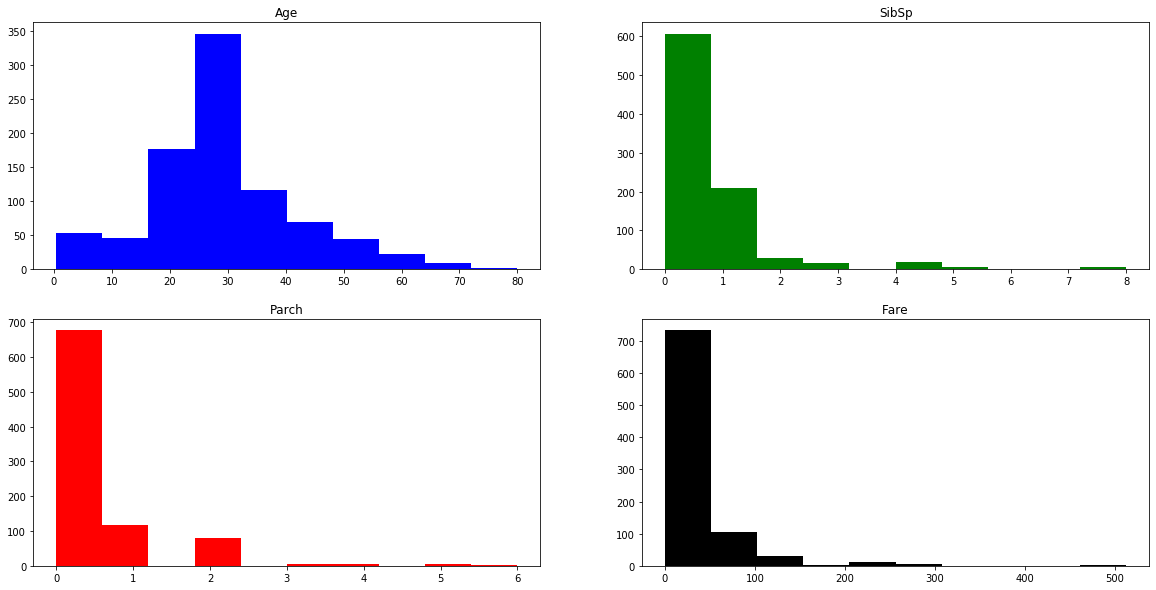

In [196]:
rcParams['figure.figsize'] = 20, 10
fig, axes = plt.subplots(nrows=2, ncols=2)
colors = ['b', 'g', 'r', 'k']
n_bins = 10
for n, zippack in enumerate(zip(axes.flatten(), DBtrain_num)):
    axhist , i_label = zippack
    axhist.hist(DBtrain[i_label], histtype='bar',color=colors[n] ,density =None)
    axhist.D(i_label)

### Correlation between numerical features

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


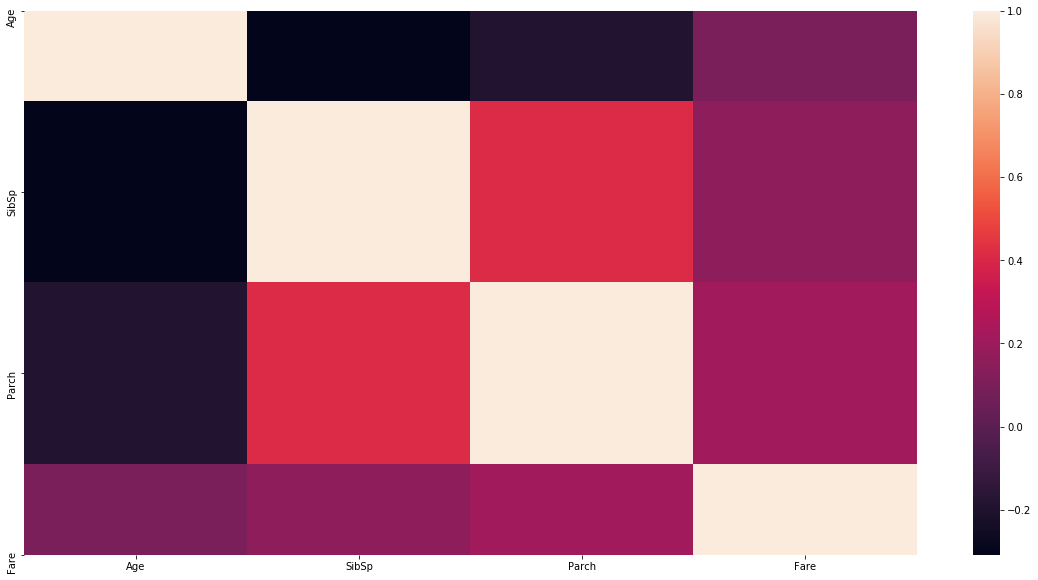

In [6]:
coor_matrix = DBtrain[DBtrain_num].corr()
print(coor_matrix)
_ = sns.heatmap(coor_matrix)

In [7]:
### Mean Value for every num_val VS Survived
"""
We can see that:
more young more probability to sirvived
more reach more ...

"""
pd.pivot_table(DBtrain, index= 'Survived',values= DBtrain_num,aggfunc='mean' )


,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


### Barchar for categorical Data

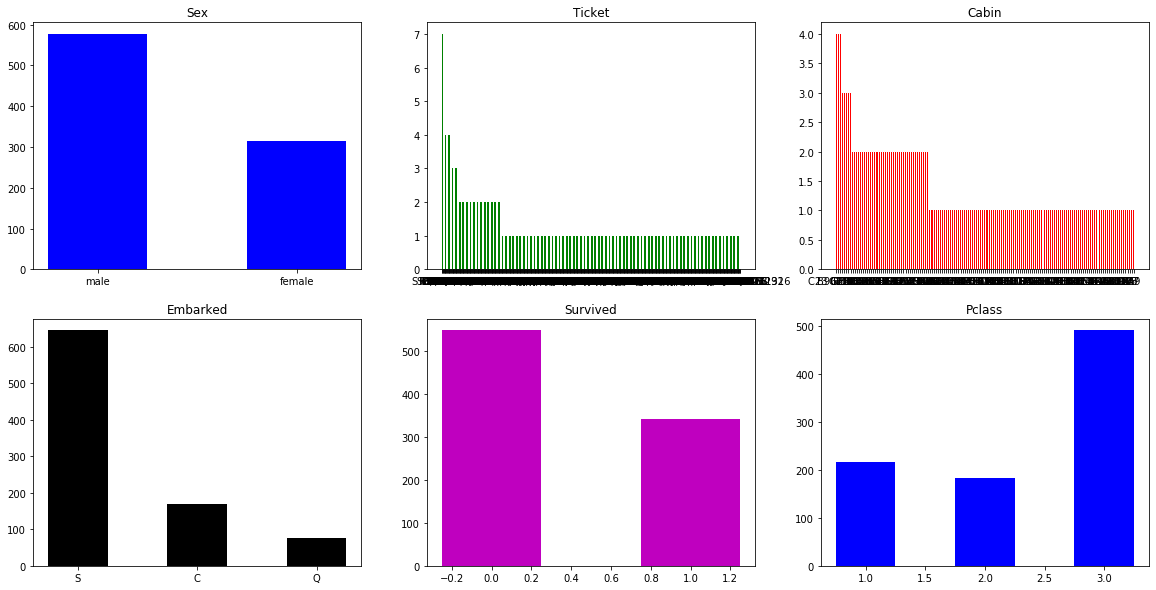

In [8]:
rcParams['figure.figsize'] = 20, 10
fig, axes = plt.subplots(nrows=2, ncols=3)
colors = ['b', 'g', 'r', 'k','m','b']
for n, zippack in enumerate(zip(axes.flatten(), DBtrain_cat)):
    axhist , i_label = zippack
    axhist.bar(DBtrain[i_label].value_counts().index.astype('object'), DBtrain[i_label].value_counts(),color=colors[n],width=0.5)
    axhist.set_title(i_label)

In [9]:
# We try to visualice some relation between survivers and his conditions in the journy
not_pivot = ['Survived','Ticket', 'Cabin' ]
for i_label in DBtrain_cat:
    if i_label not in not_pivot:
        _ = pd.pivot_table(DBtrain, columns= i_label, index= 'Survived',values= 'Ticket',aggfunc='count')
        print(_)
        print('__________________________')

Sex       female  male
Survived              
0             81   468
1            233   109
__________________________
Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217
__________________________
Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119
__________________________


## Feature Engineering

#### Augmented Features
* Transform cabin string feature into a number that represent how many cabins a passager bought
* Take more features, asumming that one person bought all cabin with the same firts word, so we can count how many "cabin Type" bought a passenger
* Take more features from the "Name" class, we goint to see if the title name is relevant to determine if someone survive

In [37]:
# Exploring what is Cabin, we can see that not everyone buy for a cabin, event some wealthy people bought more than one cabin
"""
We can denote that the name of the cabins dosen't matter, only mather the numbers of cabin that a people buy,
that could be related whit his wealthiness.
For other hand, we can pretend that the name or first word in the cabin name, have some importanci over the survivors
"""
_=DBtrain['Cabin'].value_counts().sort_values(ascending=False )
print(_.shape)
print(_)
# Count how many cabins a passenger bought
DBtrain['Count_Cabin'] = DBtrain['Cabin'].apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
#DBtrain['Count_Cabin'].value_counts()

# Categorizing which type of cabin a passenger bought
DBtrain['w_Cabin'] = DBtrain['Cabin'].apply(lambda x: 'nn' if pd.isna(x) else x[0])
#DBtrain['w_Cabin'].value_counts()

(147,)
G6             4
B96 B98        4
C23 C25 C27    4
D              3
E101           3
              ..
A23            1
A14            1
B71            1
D47            1
D11            1
Name: Cabin, Length: 147, dtype: int64


In [38]:
# We will see the relation between survivors and the number of cabin that bought
_ = pd.pivot_table(DBtrain, columns= 'Count_Cabin', index= 'Survived',values= 'Ticket',aggfunc='count')
print(_)
print("______________________")
# we will see the relatión between survivors and the type of cabin that they bought
_ = pd.pivot_table(DBtrain, columns= 'w_Cabin', index= 'Survived',values= 'Ticket',aggfunc='count')
print(_)

Count_Cabin      0      1    2    3    4
Survived                                
0            481.0   58.0  7.0  3.0  NaN
1            206.0  122.0  9.0  3.0  2.0
______________________
w_Cabin     A     B     C     D     E    F    G    T     nn
Survived                                                   
0         8.0  12.0  24.0   8.0   8.0  5.0  2.0  1.0  481.0
1         7.0  35.0  35.0  25.0  24.0  8.0  2.0  NaN  206.0


In [97]:
# We goint to pretend that we could find a posible relationship in the name title of a person
DBtrain['title_Name'] = DBtrain['Name'].apply(lambda x: x.split(',')[1:][0].split('.')[0].strip())
DBtrain['title_Name'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Col               2
Major             2
Ms                1
Sir               1
Capt              1
Jonkheer          1
the Countess      1
Don               1
Mme               1
Lady              1
Name: title_Name, dtype: int64

In [150]:
# We goint to pretend that there is a relatión between the ticket ID and the survivors
#   We take two new features
#      1. If a ticket is a number, take the logarithm10 round to whole
#      2. If a ticket start with a letter, take that string of letters. This technique is so risky, because in our test set could be a new string and will be in trouble
countbyTicket = DBtrain['Ticket'].value_counts()#.sort_values(ascending = False)
DBtrain['num_Ticket'] = DBtrain['Ticket'].apply(lambda x: 1 if x.isnumeric() else 0)
DBtrain['word_Ticket'] = DBtrain['Ticket'].apply(lambda x: x.split(' ')[0].replace('.', '').replace('/','').lower() if not x.split(' ')[0].isnumeric() else 0)
print(DBtrain['num_Ticket'].value_counts())
print(DBtrain['word_Ticket'].value_counts())

1    661
0    230
Name: num_Ticket, dtype: int64
0          661
pc          60
ca          41
a5          21
sotonoq     15
stono       12
scparis     11
wc          10
a4           7
soc          6
stono2       6
fcc          5
c            5
line         4
wep          3
pp           3
scah         3
sopp         3
sotono2      2
swpp         2
ppp          2
sca4         1
sc           1
fc           1
fa           1
as           1
sop          1
scow         1
sp           1
casoton      1
Name: word_Ticket, dtype: int64


In [153]:
# We will see the relationship between ticket number log10 agains survivors
_ = pd.pivot_table(DBtrain, columns= 'num_Ticket', index= 'Survived',values= 'Ticket',aggfunc='count')
print(_)
print("______________________")
# we will see the relationship between word ticket agains survivors
_ = pd.pivot_table(DBtrain, columns= 'word_Ticket', index= 'Survived',values= 'Ticket',aggfunc='count')
print(_)
# We can't see any relationship, the differences are not statistically relevant
#    We only take the num_ticket is a litle more relevant (who have numeric tickets or letter+number ticket)

num_Ticket    0    1
Survived            
0           142  407
1            88  254
______________________
word_Ticket      0   a4    a5   as    c    ca  casoton   fa   fc  fcc  ...  \
Survived                                                               ...   
0            407.0  7.0  19.0  1.0  3.0  27.0      1.0  1.0  1.0  1.0  ...   
1            254.0  NaN   2.0  NaN  2.0  14.0      NaN  NaN  NaN  4.0  ...   

word_Ticket  sop  sopp  sotono2  sotonoq   sp  stono  stono2  swpp   wc  wep  
Survived                                                                      
0            1.0   3.0      2.0     13.0  1.0    7.0     3.0   NaN  9.0  2.0  
1            NaN   NaN      NaN      2.0  NaN    5.0     3.0   2.0  1.0  1.0  

[2 rows x 30 columns]


#### Fill Nan values and Normalize data

In [199]:
DBtrain.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Count_Cabin,group_Ticket,num_Ticket,norm_Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.642093,0.524184,0.382452,32.096681,0.265467,1.787402,0.741282,-inf
std,256.998173,0.486260,0.834700,12.968346,1.103705,0.806761,49.697504,0.546642,1.362636,0.438177,NaN
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-inf
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800,0.000000,1.000000,0.000000,0.897396
50%,446.000000,0.000000,3.000000,29.642093,0.000000,0.000000,14.454200,0.000000,1.000000,1.000000,1.159994
75%,668.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,0.000000,2.000000,1.000000,1.491362
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,4.000000,7.000000,1.000000,2.709549


In [195]:
#DBtrain.info()
#DBtrain.describe()
# we detect that Some values of Fare are 0 ¿? could be an error or a gifs
# we detect that we have some NaN data,like error in our dataset
#    Age and Embarked
# Age => complete the nan values with mean value
# Embarked => impute value is unknow, there are only two values => drop rows
#DBtrainf = DBtrain.drop(index = DBtrain.loc[DBtrain['Embarked']!=DBtrain['Embarked']].index.tolist())
DBtrain.dropna(subset = ['Embarked'], inplace=True)
DBtrain['Age'] = DBtrain['Age'].fillna( DBtrain['Age'].mean())
DBtrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Count_Cabin,w_Cabin,title_Name,group_Ticket,num_Ticket,word_Ticket
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,nn,Mr,1,0,a5
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,C,Mrs,1,0,pc
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,nn,Miss,1,0,stono2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,C,Mrs,2,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,nn,Mr,1,1,0


Text(0.5, 1.0, 'Fare normalized')

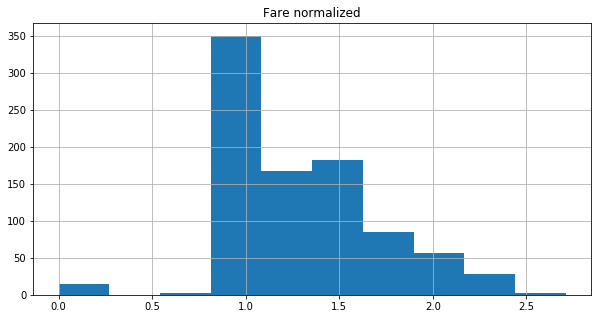

In [214]:
# On "Histogram for numerical Data" we saw that "Fare" is not normalize, the distance between his values are significance
#     We try to normalize that data, taken the logarithm10 to those values
rcParams['figure.figsize'] = 10, 5
DBtrain['norm_Fare']= DBtrain['Fare'].apply(lambda x : np.log10(x+1))
DBtrain['norm_Fare'].hist().set_title('Fare normalized')
# we can see that the histogram look like a normal distributions more accurate

# Pre-processing data to Train Models
Because we have categorical data, we need to transform all the categorical data into arrays that our model can interpretate,
we can use pd.dummies or hot-encode, in this case are equal, also we need to drop the columns that we dont use anymore

In [235]:
DBtrain_f = DBtrain.copy()
DBtrain_f.index  = DBtrain_f.PassengerId
DBtrain_f = DBtrain_f.drop(columns=['group_Ticket', 'Cabin', 'Ticket','Fare','Name','PassengerId','word_Ticket'])
DBtrain_f['Pclass'] = DBtrain_f['Pclass'].astype(str) # categorical feature
DBtrain_f['num_Ticket'] = DBtrain_f['num_Ticket'].astype(str) # categorical feature
DBtrain_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 1 to 891
Data columns (total 12 columns):
Survived       889 non-null int64
Pclass         889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Embarked       889 non-null object
Count_Cabin    889 non-null int64
w_Cabin        889 non-null object
title_Name     889 non-null object
num_Ticket     889 non-null object
norm_Fare      889 non-null float64
dtypes: float64(2), int64(4), object(6)
memory usage: 90.3+ KB


In [242]:
DBtrain_f = pd.get_dummies(DBtrain_f)
X_train = DBtrain_f.drop(columns='Survived')
Y_train = DBtrain_f['Survived']
DBtrain_f.head()

,Survived,Age,SibSp,Parch,Count_Cabin,norm_Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,...,title_Name_Mlle,title_Name_Mme,title_Name_Mr,title_Name_Mrs,title_Name_Ms,title_Name_Rev,title_Name_Sir,title_Name_the Countess,num_Ticket_0,num_Ticket_1
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,22.0,1,0,0,0.916454,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
2,1,38.0,1,0,1,1.859038,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0
3,1,26.0,0,0,0,0.950608,0,0,1,1,...,0,0,0,0,0,0,0,0,1,0
4,1,35.0,1,0,1,1.733197,1,0,0,1,...,0,0,0,1,0,0,0,0,0,1
5,0,35.0,0,0,0,0.956649,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1


# Modeling

[LibSVM]SVM: acc:0.8346456692913385


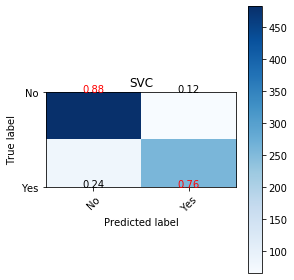

In [272]:
#Modelo con SVC
clf = svm.SVC(verbose= True,random_state=5,C=10, kernel='linear', gamma='auto')
fit_model = clf.fit(X_train, Y_train)
y_pred = clf.predict(X_train)
print("SVM: acc:"+ str(accuracy_score(Y_train, y_pred)))
plot_confusion_matrix(y_true=Y_train, y_pred=y_pred, class_names=['No', 'Yes'],title="SVC",normalize=True, size=4)

XGB: acc:0.983127109111361


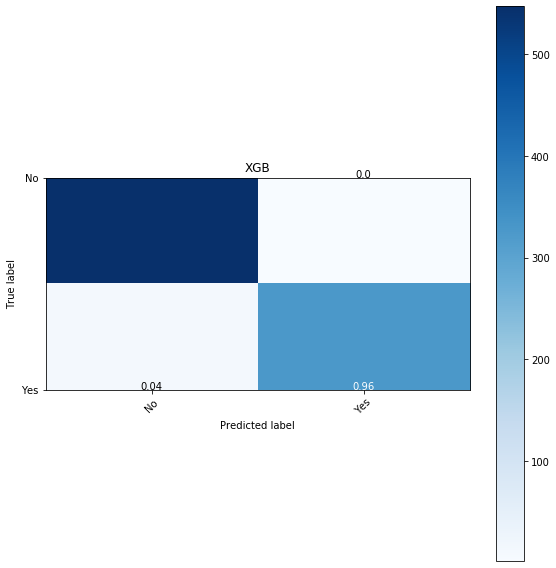

In [256]:

xgb_model = XGBClassifier(learning_rate=0.01,
                    n_estimators=1200,
                    max_depth=100,
                    min_child_weight=.05,
                    gamma=0,
                    subsample=.5,
                    colsample_bytree=0.5,
                    objective='multi:softmax',
                    num_class=10,
                    num_parallel_tree = 18,
                    seed=27,verbosity= 1,n_jobs=8 )
xgb_model.fit(X_train, Y_train)
#xgb_model.save_model('models/xgbmodel')
y_pred = xgb_model.predict(X_train)
print("XGB: acc:"+ str(accuracy_score(Y_train, y_pred)))
plot_confusion_matrix(y_true=Y_train, y_pred=y_pred, class_names=['No', 'Yes'],title="XGB",normalize=True, size=4)

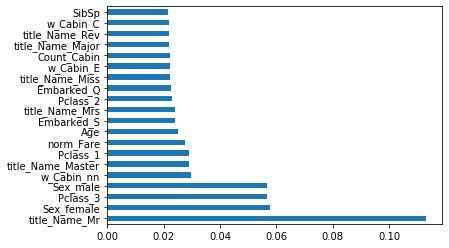

In [258]:
feature_importance = pd.Series(xgb_model.feature_importances_, index=X_train.columns.tolist())
feature_importance.nlargest(20).plot(kind='barh')